In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [3]:
data = pd.read_csv("iris (2).csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
oe = OrdinalEncoder()
data[["species"]] = oe.fit_transform(data[["species"]])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
y = data.iloc[:, -1]
X = data.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [11]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [16]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [12]:
n_estimators_list = [10, 50, 100, 200, 500, 1000]
accuracies = []

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with n_estimators={n}: {accuracy:.4f}")

Accuracy with n_estimators=10: 1.0000
Accuracy with n_estimators=50: 1.0000
Accuracy with n_estimators=100: 1.0000
Accuracy with n_estimators=200: 1.0000
Accuracy with n_estimators=500: 1.0000
Accuracy with n_estimators=1000: 1.0000


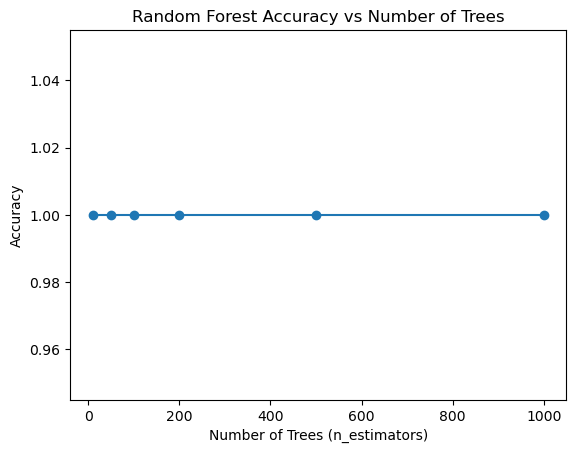

In [13]:
plt.plot(n_estimators_list, accuracies, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs Number of Trees')
plt.show()

In [14]:
optimal_n_estimators = n_estimators_list[np.argmax(accuracies)]
print(f"Best accuracy is obtained with n_estimators={optimal_n_estimators}")

Best accuracy is obtained with n_estimators=10
